In [1]:
import sys
import os
from pathlib import Path
from dotenv import load_dotenv
from pprint import pprint

# Load environment variables from .env
load_dotenv()
# Add src folder to path
project_root = Path.cwd().parent  # assumes notebook is in child folder
src_path = project_root / "sources"
sys.path.append(str(src_path))
from core.llm import OpenRouterClient
from utils.generate_dsl_docs import generate_symbolic_dsl_reference_markdown
from agents.agents_utils import MultiGridFeatureCollector, SymbolicGridMapper

/usr/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# json_file = "/workspaces/arcprize2025/datas/arc-agi_training_challenges.json"
# json_file = r"C:\Users\UT00YBG3\Documents\arcprize2025\datas\arc-agi_training_challenges.json"
json_file = "/home/yann/ssd_storage/python/arcprize2025/datas/arc-agi_training_challenges.json"

In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np


def plot_grid(grid, title=""):
    """
    Plots a single 2D grid using matplotlib.
    
    Parameters:
    - grid: List of lists of integers.
    - title: Optional title for the plot.
    """
    grid_array = np.array(grid)
    plt.figure(figsize=(2, 2))
    plt.imshow(grid_array, cmap='tab20', interpolation='nearest')
    plt.title(title)
    plt.axis('off')
    plt.show()

{'input': [[6, 6, 0], [6, 0, 0], [0, 6, 6]], 'output': [[6, 6, 0, 6, 6, 0, 0, 0, 0], [6, 0, 0, 6, 0, 0, 0, 0, 0], [0, 6, 6, 0, 6, 6, 0, 0, 0], [6, 6, 0, 0, 0, 0, 0, 0, 0], [6, 0, 0, 0, 0, 0, 0, 0, 0], [0, 6, 6, 0, 0, 0, 0, 0, 0], [0, 0, 0, 6, 6, 0, 6, 6, 0], [0, 0, 0, 6, 0, 0, 6, 0, 0], [0, 0, 0, 0, 6, 6, 0, 6, 6]]}


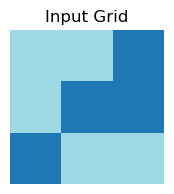

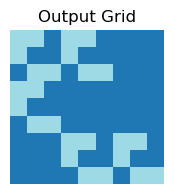

In [4]:
n=1


with open(json_file, 'r') as file:
    data = json.load(file)

data.keys()
list_number = list(data.keys())
puzzle = data[list_number[n]]
example_0= puzzle["train"][0]
print(example_0)
plot_grid(example_0["input"], title="Input Grid")
plot_grid(example_0["output"], title="Output Grid")

In [5]:
mapper = SymbolicGridMapper()
symbolic_variants = mapper.generate_variants(puzzle, symbol_set_ids=["katakana_final_refined_1", "katakana_final_refined_2"])
symbolics_grids = mapper.format_variants_list(symbolic_variants)
doc_sigil = generate_symbolic_dsl_reference_markdown()


In [10]:
prompt = f"""
You are an advanced AI specializing in synthesizing solutions for Abstraction and Reasoning Corpus (ARC) puzzles.

---
**Task:**
Your primary task is to discover and formulate a *single, generalizable DSL rule* that transforms the given `input_grid` into the corresponding `output_grid` for *all* provided examples.

---
**Resources:**
1.  **DSL Command Documentation:**
    This section describes the available Domain Specific Language (DSL) commands, their symbols, parameters, and expected behavior. You must use only these commands.
    {doc_sigil}

2.  **Input-Output Grid Examples:**
    This section provides a set of `(input_grid, output_grid)` pairs. Your synthesized rule must correctly generalize to all of them.
    {symbolics_grids}

---
**Rule Requirements:**
* The rule must be expressed as a **single symbolic DSL string**.
* It must use only the commands specified in the provided DSL documentation.
* It must be concise and represent a **generalizable transformation**, not just a specific solution for one example.

---
**Strategy (Recommended):**
1.  Carefully analyze each `input_grid` and its corresponding `output_grid`.
2.  Identify the core transformation logic: What changes? What stays the same? Are there patterns of color changes, shape manipulations, positional shifts, or structural compositions?
3.  Consider how available DSL commands can be combined or parameterized to achieve this observed transformation.
4.  Formulate the most concise and general DSL string that applies to *all* provided examples.

---
**Output Format:**
Please provide only the DSL rule string. Start your response with `[DSL_RULE_START]` and end with `[DSL_RULE_END]`.
"""

In [12]:
print(prompt)


You are an advanced AI specializing in synthesizing solutions for Abstraction and Reasoning Corpus (ARC) puzzles.

---
**Task:**
Your primary task is to discover and formulate a *single, generalizable DSL rule* that transforms the given `input_grid` into the corresponding `output_grid` for *all* provided examples.

---
**Resources:**
1.  **DSL Command Documentation:**
    This section describes the available Domain Specific Language (DSL) commands, their symbols, parameters, and expected behavior. You must use only these commands.
    ### Alternate

                * **Symbolic Rules:**
                ```python
                {   'alternate': {   'nested_commands': {   'first': 'first_command_str',
                                            'second': 'second_command_str'},
                     'pattern': '^⇌\\((?P<first_command_str>.+?)\\s*,\\s*(?P<second_command_str>.+)\\)$',
                     'transform_params': <function <lambda> at 0x7f0c8271bb00>}}
                    Synth

In [13]:
rule = """
⟹(
    ◨(Ⳁ(), III, III),
    M(
        ⊕(IX, IX, ∅),
        ▦(III, III, "∅∅I;∅II;I∅∅")
)
"""

In [15]:
from core.dsl_symbolic_interpreter import SymbolicRuleParser
parser = SymbolicRuleParser()
command = parser.parse_rule(rule)
# Convert input to ndarray
# input_ndarray = np.array(input_grid)

# # Execute the command
# result = command.execute(input_ndarray)

ValueError: Could not parse symbolic token: '⟹(
    ◨(Ⳁ(), III, III),
    M(
        ⊕(IX, IX, ∅),
        ▦(III, III, "∅∅I;∅II;I∅∅")
)'